## Linear Regression

* Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.

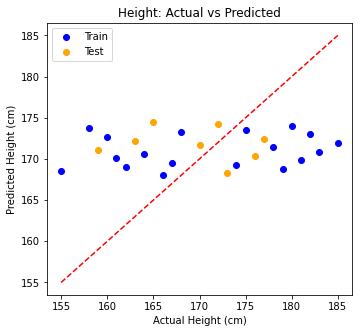

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv('data.csv')

# Encode categorical Name column
le = LabelEncoder()
df['Name_encoded'] = le.fit_transform(df['Name'])

# Features and targets
X = df[['Name_encoded']]
y = df[['Height', 'Weight']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Prepare results DataFrames
train_results = X_train.copy()
train_results['Predicted_Height'] = y_train_pred[:, 0]
train_results['Actual_Height'] = y_train['Height']
train_results['Predicted_Weight'] = y_train_pred[:, 1]
train_results['Actual_Weight'] = y_train['Weight']

test_results = X_test.copy()
test_results['Predicted_Height'] = y_test_pred[:, 0]
test_results['Actual_Height'] = y_test['Height']
test_results['Predicted_Weight'] = y_test_pred[:, 1]
test_results['Actual_Weight'] = y_test['Weight']

# Plotting

plt.figure(figsize=(12, 5))

# Height plot
plt.subplot(1, 2, 1)
plt.scatter(train_results['Actual_Height'], train_results['Predicted_Height'], color='blue', label='Train')
plt.scatter(test_results['Actual_Height'], test_results['Predicted_Height'], color='orange', label='Test')
plt.plot([df['Height'].min(), df['Height'].max()],
         [df['Height'].min(), df['Height'].max()],
         color='red', linestyle='--')
plt.title('Height: Actual vs Predicted')
plt.xlabel('Actual Height (cm)')
plt.ylabel('Predicted Height (cm)')
plt.legend()
